# Imports

In [34]:
import torch
import pandas as pd
import os
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

In [35]:
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'white'

In [3]:
%run ../mimic_cxr.py

# Load metadata

In [13]:
FNAME_PREFIX = 'mimic-cxr-2.0.0'

In [14]:
fpath = os.path.join(DATASET_DIR, f'{FNAME_PREFIX}-metadata.csv')
metadata = pd.read_csv(fpath)
metadata.head()

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,ViewCodeSequence_CodeMeaning,PatientOrientationCodeSequence_CodeMeaning
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),postero-anterior,Erect
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),lateral,Erect
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),postero-anterior,Erect
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),lateral,Erect
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),antero-posterior,NaN


In [15]:
fpath = os.path.join(DATASET_DIR, f'{FNAME_PREFIX}-chexpert.csv')
chexpert_df = pd.read_csv(fpath)
chexpert_df.fillna(0, inplace=True)
chexpert_df.replace(-1, 1, inplace=True)
chexpert_df.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10000032,53911762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10000032,56699142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10000764,57375967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Plot example

In [16]:
from PIL import Image

In [17]:
idx = -1001
row = metadata.iloc[idx]
row

dicom_id                                      76b55d6d-492245e2-c56a31ae-9f0d1cf4-78005e3b
subject_id                                                                        19974002
study_id                                                                          52374783
PerformedProcedureStepDescription                                       CHEST (PA AND LAT)
ViewPosition                                                                            PA
Rows                                                                                  3056
Columns                                                                               2544
StudyDate                                                                         21470415
StudyTime                                                                           214927
ProcedureCodeSequence_CodeMeaning                                       CHEST (PA AND LAT)
ViewCodeSequence_CodeMeaning                                              postero-anterior

In [18]:
subject_id = f'p{row["subject_id"]}'
study_id = f's{row["study_id"]}'
dicom_id = str(row['dicom_id'])
image_fname = f'{dicom_id}.jpg'
subfolder = subject_id[:3]
subfolder, subject_id, study_id, image_fname

('p19',
 'p19974002',
 's52374783',
 '76b55d6d-492245e2-c56a31ae-9f0d1cf4-78005e3b.jpg')

In [19]:
image_fpath = os.path.join(DATASET_DIR, 'images', subfolder, subject_id, study_id, image_fname)

(2544, 3056)


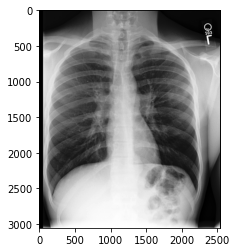

In [20]:
image = Image.open(image_fpath)
print(image.size)
plt.imshow(image, cmap='gray')

In [21]:
report_fpath = os.path.join(DATASET_DIR, 'reports', subfolder, subject_id, f'{study_id}.txt')

In [22]:
with open(report_fpath) as f:
    text = f.read()
print(text)

                                 FINAL REPORT
 HISTORY:   Influenza like illness, fever and asthma exacerbation.
 
 TECHNIQUE:  PA and lateral views of the chest.
 
 COMPARISON:  None.
 
 FINDINGS:
 
 Heart size is normal.  Hilar contours are unremarkable.  Focal pulled along
 the left lateral aspect of the descending thoracic aortic contour at the level
 of the aortic hiatus is noted.  The pulmonary vascularity is normal.  Focal
 round hazy opacity is noted within the left mid lung field, concerning for
 pneumonia.  Right lung is clear.  No pleural effusion or pneumothorax is
 identified.  There are no acute osseous abnormalities detected.
 
 IMPRESSION:
 
 1. Rounded hazy opacity in the left mid lung field, concerning for pneumonia.
 
 2. Left lateral bulge along the descending thoracic aortic contour at the
 level of the aortic hiatus, of uncertain etiology.  This could be further
 assessed with CT or MRI on a nonemergent basis.



# Labels distribution

In [23]:
%run ../common/constants.py

In [29]:
chexpert_df.head()

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,10000032,53189527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,10000032,53911762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,10000032,56699142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10000764,57375967,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
n_samples = len(chexpert_df['study_id'])
n_patients = len(chexpert_df['subject_id'])

values = []
for disease in CHEXPERT_DISEASES:
    value = chexpert_df[disease].sum()
    values.append((disease, value))

values = sorted(values, key=lambda x:x[1], reverse=True)
labels, amounts = zip(*values)

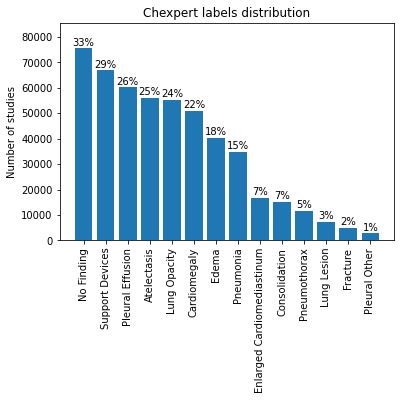

In [72]:
plt.bar(labels, amounts)
plt.xticks(rotation=90)
plt.ylabel('Number of studies')
plt.ylim(0, amounts[0] + 10000)
plt.title('Chexpert labels distribution')

for index, (amount, disease) in enumerate(zip(amounts, labels)):
    perc = amount / n_samples * 100
    plt.text(index, amount + 1200, f'{perc:.0f}%', ha='center')

# Create master csv

## Keep only studies with a report present

In [89]:
%run -n ../preprocess/mimic_cxr.py

In [90]:
reports_df = load_raw_reports_df()
reports_df.head()

,study,findings
0,s53911762,No acute intrathoracic process.
1,s56699142,No acute cardiopulmonary process.
2,s53189527,No acute cardiopulmonary abnormality.
3,s50414267,No acute cardiopulmonary process.
4,s57375967,"Focal consolidation at the left lung base, pos..."


In [91]:
studies_with_report = set(int(report[1:]) for report in reports_df['study'])
len(studies_with_report)

227827

## Check metadata vs chexpert discrepancies

* Only studies with a report are kept
* There are a few studies with no report, present in metadata and chexpert_df csvs

In [92]:
len(metadata), len(chexpert_df)

(377110, 227827)

In [93]:
studies1 = set(metadata['study_id'])
studies2 = set(chexpert_df['study_id'])
len(studies1), len(studies2), studies2.issubset(studies1)

(227835, 227827, True)

In [94]:
studies11 = studies1.intersection(studies_with_report)
studies22 = studies2.intersection(studies_with_report)
len(studies11), len(studies22), studies11 == studies22

(227827, 227827, True)

## Merge metadata and chexpert

In [95]:
metadata_filtered = metadata.loc[metadata['study_id'].isin(studies_with_report)]
len(metadata_filtered), len(set(metadata_filtered['study_id']))

(377095, 227827)

In [96]:
chexpert_filtered = chexpert_df.loc[chexpert_df['study_id'].isin(studies_with_report)]
len(chexpert_filtered), len(set(chexpert_filtered['study_id']))

(227827, 227827)

In [97]:
studies1 = set(metadata_filtered['study_id'])
studies2 = set(chexpert_filtered['study_id'])
assert studies1 == studies2

In [98]:
master_df = metadata_filtered.merge(
    chexpert_filtered, on=['study_id', 'subject_id'], how='inner')
len(master_df), len(set(master_df['study_id']))

(377095, 227827)

In [99]:
master_df.head()

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,...,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## Merge with split

In [100]:
fpath = os.path.join(DATASET_DIR, f'{FNAME_PREFIX}-split.csv')
split_df = pd.read_csv(fpath)
split_df.head()

,dicom_id,study_id,subject_id,split
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,50414267,10000032,train
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,50414267,10000032,train
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,53189527,10000032,train
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,53189527,10000032,train
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,53911762,10000032,train


In [101]:
master_df = master_df.merge(split_df, on=['dicom_id', 'study_id', 'subject_id'], how='inner')
len(master_df), len(set(master_df['study_id']))

(377095, 227827)

In [102]:
master_df.head()

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,...,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,split
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train


## Add filepaths

In [103]:
def get_filenames(subject_id, study_id, dicom_id):
    subject_id = f'p{subject_id}'
    study_id = f's{study_id}'
    image_fname = f'{dicom_id}.jpg'
    subfolder = subject_id[:3]

    image_fpath = os.path.join(subfolder, subject_id, study_id, image_fname)
    report_fpath = os.path.join(subfolder, subject_id, f'{study_id}.txt')
    
    return image_fpath, report_fpath

In [104]:
image_fpaths, report_fpaths = zip(*[
    get_filenames(*ids)
    for ids in zip(master_df['subject_id'], master_df['study_id'], master_df['dicom_id'])
])
len(image_fpaths), len(report_fpaths)

(377095, 377095)

In [105]:
master_df['image_fpath'] = image_fpaths
master_df['report_fpath'] = report_fpaths

In [106]:
master_df.head()

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,...,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,split,image_fpath,report_fpath
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train,p10/p10000032/s50414267/02aa804e-bde0afdd-112c...,p10/p10000032/s50414267.txt
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train,p10/p10000032/s50414267/174413ec-4ec4c1f7-34ea...,p10/p10000032/s50414267.txt
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train,p10/p10000032/s53189527/2a2277a9-b0ded155-c0de...,p10/p10000032/s53189527.txt
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train,p10/p10000032/s53189527/e084de3b-be89b11e-20fe...,p10/p10000032/s53189527.txt
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train,p10/p10000032/s53911762/68b5c4b1-227d0485-9cc3...,p10/p10000032/s53911762.txt


## Check lateral or frontal

In [107]:
master_df.head()

,dicom_id,subject_id,study_id,PerformedProcedureStepDescription,ViewPosition,Rows,Columns,StudyDate,StudyTime,ProcedureCodeSequence_CodeMeaning,...,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices,split,image_fpath,report_fpath
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,CHEST (PA AND LAT),PA,3056,2544,21800506,213014.531,CHEST (PA AND LAT),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train,p10/p10000032/s50414267/02aa804e-bde0afdd-112c...,p10/p10000032/s50414267.txt
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,CHEST (PA AND LAT),LATERAL,3056,2544,21800506,213014.531,CHEST (PA AND LAT),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train,p10/p10000032/s50414267/174413ec-4ec4c1f7-34ea...,p10/p10000032/s50414267.txt
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,CHEST (PA AND LAT),PA,3056,2544,21800626,165500.312,CHEST (PA AND LAT),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train,p10/p10000032/s53189527/2a2277a9-b0ded155-c0de...,p10/p10000032/s53189527.txt
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,CHEST (PA AND LAT),LATERAL,3056,2544,21800626,165500.312,CHEST (PA AND LAT),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train,p10/p10000032/s53189527/e084de3b-be89b11e-20fe...,p10/p10000032/s53189527.txt
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,CHEST (PORTABLE AP),AP,2705,2539,21800723,80556.875,CHEST (PORTABLE AP),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,train,p10/p10000032/s53911762/68b5c4b1-227d0485-9cc3...,p10/p10000032/s53911762.txt


### Check weird positions 

In [108]:
positions = list(Counter(master_df['ViewPosition']).keys())
positions

['PA',
 'LATERAL',
 'AP',
 'LL',
 nan,
 'LAO',
 'RAO',
 'AP AXIAL',
 'SWIMMERS',
 'PA LLD',
 'AP LLD',
 'XTABLE LATERAL',
 'AP RLD',
 'PA RLD',
 'LPO']

In [109]:
weird_pos = positions[5:]
weird_pos

['LAO',
 'RAO',
 'AP AXIAL',
 'SWIMMERS',
 'PA LLD',
 'AP LLD',
 'XTABLE LATERAL',
 'AP RLD',
 'PA RLD',
 'LPO']

In [110]:
cols = ['image_fpath',
        'ViewPosition', 'PerformedProcedureStepDescription', 'ViewCodeSequence_CodeMeaning',
        # 'dicom_id',
       ]
df = master_df[cols]
weird_images = df.loc[df['ViewPosition'].isin(weird_pos)]
print(len(weird_images))

21


In [151]:
weird_images.sort_values('ViewPosition')

,image_fpath,ViewPosition,PerformedProcedureStepDescription,ViewCodeSequence_CodeMeaning
314412,p18/p18325837/s53945782/e95dab1a-35277057-06a5...,AP AXIAL,CHEST (PA AND LAT),antero-posterior
152984,p14/p14068639/s59789547/592a4f29-9dbedad3-7bb7...,AP AXIAL,CHEST (PA AND LAT),antero-posterior
245726,p16/p16511964/s58192474/a709b26a-bdd22fa4-c237...,AP LLD,CHEST (PORTABLE AP),antero-posterior
171822,p14/p14584705/s53442946/90cfd1af-d0745f94-d402...,AP LLD,CHEST (PORTABLE AP),antero-posterior
311035,p18/p18248508/s56866940/fd154968-8792a43c-688c...,AP RLD,CHEST (PORTABLE AP),antero-posterior
279693,p17/p17418579/s52907670/88f9f07a-cca3db55-5885...,AP RLD,CHEST (PORTABLE AP),antero-posterior
59536,p11/p11604900/s55592749/adecfaf9-19607119-492e...,LAO,CHEST (PA AND LAT),left anterior oblique
103347,p12/p12749637/s51366076/8dd012e1-61c6e46b-c634...,LAO,NaN,left anterior oblique
103348,p12/p12749637/s51366076/eee0dffe-785a6507-abfa...,LAO,NaN,left anterior oblique
361216,p19/p19596157/s59567265/8d739bc3-d59ddf1f-b33e...,LPO,CHEST (BOTH OBLIQUES ONLY) PORT,Recumbent


In [146]:
' '.join(list(weird_images['image_fpath']))

'p11/p11604900/s55592749/adecfaf9-19607119-492efcb4-893f689d-f3878f72.jpg p11/p11604900/s55592749/ca26a21d-a463ec18-769b3820-6a67408f-88f6d707.jpg p12/p12749637/s51366076/29c5aae9-6673f34e-dabe2bdd-57dcfc41-30f0620c.jpg p12/p12749637/s51366076/8dd012e1-61c6e46b-c634921d-c3a11d4e-2046d0e1.jpg p12/p12749637/s51366076/eee0dffe-785a6507-abfa945e-b9b6a36a-4132b41f.jpg p12/p12749637/s51366076/f5d4e935-ce59dfb8-7e648510-ac5196e8-14cb0997.jpg p14/p14068639/s59789547/592a4f29-9dbedad3-7bb7ac24-76864a7b-1108a170.jpg p14/p14306557/s57370900/79db9be0-1a40c0b4-78171b56-63d7969a-8aa661b0.jpg p14/p14421594/s52608348/3142201f-8a7bf627-d28bc272-fd126d5d-496ac866.jpg p14/p14584705/s53442946/90cfd1af-d0745f94-d402d6ff-3fa26d16-7ce58e8b.jpg p16/p16092597/s55416420/f9c2e704-5e638183-d5cb01e7-f1cd85fb-9bbf7702.jpg p16/p16511964/s58192474/a709b26a-bdd22fa4-c237e615-03fdacbe-737cb0c7.jpg p16/p16570780/s56992751/c3d3facc-9d552d9e-68071e01-38615d40-76b442b7.jpg p17/p17336284/s55433341/9800b28e-3ff3b417-18473be2

In [111]:
FRONTAL_POSITIONS = ['PA', 'AP', 'AP AXIAL', 'LAO', 'LPO', 'RAO']

### Check nan positions

FIXME: For now, samples with ViewPosition == nan, maybe frontal or lateral

In [153]:
Counter(master_df['ViewPosition'])

Counter({'PA': 96143,
         'LATERAL': 82849,
         'AP': 147130,
         'LL': 35120,
         nan: 15761,
         'LAO': 3,
         'RAO': 3,
         'AP AXIAL': 2,
         'SWIMMERS': 1,
         'PA LLD': 4,
         'AP LLD': 2,
         'XTABLE LATERAL': 2,
         'AP RLD': 2,
         'PA RLD': 1,
         'LPO': 1})

In [159]:
cols = ['image_fpath',
        'ViewPosition', 'PerformedProcedureStepDescription', 'ViewCodeSequence_CodeMeaning',
        # 'dicom_id',
       ]
df = master_df[cols]
nan_positions = df.loc[df['ViewPosition'].isnull()]
len(nan_positions)

15761

In [161]:
nan_positions['ViewCodeSequence_CodeMeaning'].isnull().sum()

15761

In [163]:
' '.join(list(nan_positions['image_fpath'])[:10])

'p10/p10001122/s53447138/8039752c-2ea661b7-16f1eafe-055b7e7b-dbd4cdd1.jpg p10/p10001122/s53447138/832b57d8-3ae08663-e152699e-51c5db98-b7cb4226.jpg p10/p10002013/s55312734/227844e4-4cf4b717-bb4bf0e5-961883ef-664990fe.jpg p10/p10002013/s55312734/66ccec51-f0d48809-dc6f7ba3-68acf728-a1514edf.jpg p10/p10002221/s53781756/8b88f03a-2004113d-4118def5-35820db5-d0913df8.jpg p10/p10002221/s53781756/e4ee2428-245e9222-399ef211-62b44204-35580e8d.jpg p10/p10002428/s58581921/61e718b7-5e69fae3-b75fc103-ee2b065d-983557f5.jpg p10/p10002428/s58581921/6737d541-05132323-56ebc280-232a4dcf-4c996927.jpg p10/p10002428/s58581921/917c7e6f-65034e28-593fb631-d742d472-d141b2dc.jpg p10/p10002430/s57884847/1f3f50ce-50c64ec4-888fa0f2-c87965cc-c7a03479.jpg'

## Save master csv

In [116]:
%run ../common/__init__.py

In [117]:
cols = ['dicom_id', 'subject_id', 'study_id',
        'image_fpath', 'report_fpath',
        'ViewPosition', 'split',
        ] + CHEXPERT_DISEASES

In [118]:
out_df = master_df[cols]
out_df.replace('validate', 'val', inplace=True)
out_df.head()

/home/pdpino/medical-ai/pyenv3.6/lib/python3.6/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,dicom_id,subject_id,study_id,image_fpath,report_fpath,ViewPosition,split,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,...,Lung Opacity,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,p10/p10000032/s50414267/02aa804e-bde0afdd-112c...,p10/p10000032/s50414267.txt,PA,train,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,p10/p10000032/s50414267/174413ec-4ec4c1f7-34ea...,p10/p10000032/s50414267.txt,LATERAL,train,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2a2277a9-b0ded155-c0de8eb9-c124d10e-82c5caab,10000032,53189527,p10/p10000032/s53189527/2a2277a9-b0ded155-c0de...,p10/p10000032/s53189527.txt,PA,train,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,e084de3b-be89b11e-20fe3f9f-9c8d8dfe-4cfd202c,10000032,53189527,p10/p10000032/s53189527/e084de3b-be89b11e-20fe...,p10/p10000032/s53189527.txt,LATERAL,train,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,68b5c4b1-227d0485-9cc38c3f-7b84ab51-4b472714,10000032,53911762,p10/p10000032/s53911762/68b5c4b1-227d0485-9cc3...,p10/p10000032/s53911762.txt,AP,train,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
len(out_df), len(set(out_df['subject_id'])), len(set(out_df['study_id']))

(377095, 65379, 227827)

In [120]:
Counter(out_df['split'])

Counter({'train': 368945, 'val': 2991, 'test': 5159})

In [121]:
fpath = os.path.join(DATASET_DIR, 'master_metadata.csv')
out_df.to_csv(fpath, index=False)

# Preprocess reports

Clean and tokenize

## Debug tokenizer

In [1]:
%run ../preprocess/tokenize.py

In [3]:
text_to_tokens('5 p.m., asdf dr. asdf')

['NUMBER', 'pm', ',', 'asdf', 'doctor', 'asdf', '.']

## Run preprocess

In [49]:
%run -n ../preprocess/mimic_cxr.py

In [5]:
reports, token_appearances, errors = preprocess_mimic_cxr()
len(reports), len(token_appearances)

  0%|          | 0/227827 [00:00<?, ?it/s]

Errors:  {}
Different tokens:  11526
Saved reports to:  /mnt/data/mimic-cxr-jpg/reports/reports.clean.v1.json


(227827, 11526)

## Some utils

In [6]:
REPORTS_DF = load_raw_reports_df()
REPORTS_DF.head()

,study,text,impression,findings,last_paragraph,comparison
0,s53911762,No acute intrathoracic process.,No acute intrathoracic process.,Single frontal view of the chest provided.\n \...,NaN,Chest radiograph ___
1,s56699142,No acute cardiopulmonary process.,No acute cardiopulmonary process.,"The lungs are clear of focal consolidation, pl...",NaN,"Radiographs from ___, ___ and ___."
2,s53189527,No acute cardiopulmonary abnormality.,No acute cardiopulmonary abnormality.,"The cardiac, mediastinal and hilar contours ar...",NaN,___
3,s50414267,No acute cardiopulmonary process.,No acute cardiopulmonary process.,"There is no focal consolidation, pleural effus...",NaN,None.
4,s57375967,"Focal consolidation at the left lung base, pos...","Focal consolidation at the left lung base, pos...",PA and lateral views of the chest provided. ...,NaN,None


In [53]:
fpath = os.path.join(DATASET_DIR, 'master_metadata.csv')
master_df = pd.read_csv(fpath)
master_df.head(2)

,dicom_id,subject_id,study_id,image_fpath,report_fpath,ViewPosition,split,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,...,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,report_length
0,02aa804e-bde0afdd-112c0b34-7bc16630-4e384014,10000032,50414267,p10/p10000032/s50414267/02aa804e-bde0afdd-112c...,p10/p10000032/s50414267.txt,PA,train,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,174413ec-4ec4c1f7-34ea26b7-c5f994f8-79ef1962,10000032,50414267,p10/p10000032/s50414267/174413ec-4ec4c1f7-34ea...,p10/p10000032/s50414267.txt,LATERAL,train,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [8]:
def load_raw_report(study_id):
    if isinstance(study_id, str):
        study_id = int(study_id.strip('s'))

    d = master_df.loc[master_df['study_id'] == study_id]
    
    report_fpaths = list(d['report_fpath'].unique())
    assert len(report_fpaths) == 1, f'Not 1 subject: {report_fpaths}'
    report_fpath = report_fpaths[0]
    print(report_fpath)
    report_fpath = os.path.join(DATASET_DIR, 'raw-reports', report_fpath)
    
    with open(report_fpath) as f:
        text = f.read()
    
    return text

In [9]:
import re

In [10]:
def find_reports_with_tokens(tokens):
    if isinstance(tokens, str):
        tokens = [tokens]
    found = []
    for report in reports.values():
        text = report['clean_text']
        
        for token in tokens:
            if re.search(token, text):
                found.append(report)
                break
                
    return found

## Check errors

### Check wrong reports

In [9]:
studies = list(f's{s}' for s in errors['tokens-empty'])
len(studies)

1

In [16]:
for study_id in studies:
    print('=' * 60)
    print('Study ID: ', study_id)

    report = load_raw_report(study_id)
    print(report)

    print('-' * 30)

    d = REPORTS_DF.loc[REPORTS_DF['study'] == study_id]
    ids = list(d.index)
    assert len(ids) == 1, f'Not 1 study: {d}'
    d = d.loc[ids[0]]
    for k in ['text', 'comparison', 'findings', 'impression', 'last_paragraph']:
        print(f'{k}: {d[k]}')

    print('=' * 60)

Study ID:  s54597760
p14/p14919634/s54597760.txt
                                 FINAL REPORT
   No previous images.  The heart is normal in size and there is no evidence of
 vascular congestion, pleural effusion, or acute focal pneumonia. 
 Specifically, no evidence of hilar or mediastinal adenopathy
 
 EXAMINATION:  CHEST (PA AND LAT)
 
 INDICATION:  ___ year old woman with malaise, lymphadenopathy  // R/o
 adenopathy or lung lesion      R/o adenopathy or lung lesion
 
 IMPRESSION: 
 
 .

------------------------------
text: .
comparison: nan
findings: nan
impression: .
last_paragraph: nan


### Check tokens

In [11]:
sorted([(k, v) for k, v in token_appearances.items()], key=lambda x: x[1], reverse=True)

[('.', 700513),
 ('the', 428361),
 ('of', 232665),
 (',', 224286),
 ('is', 214079),
 ('no', 192578),
 ('in', 159870),
 ('and', 136038),
 ('right', 125468),
 ('to', 108014),
 ('left', 102971),
 ('pleural', 97854),
 ('with', 94403),
 ('there', 86204),
 ('xxxx', 80561),
 ('are', 79342),
 ('pulmonary', 70948),
 ('lung', 69280),
 ('effusion', 63615),
 ('acute', 61677),
 ('a', 55991),
 ('atelectasis', 55241),
 ('pneumothorax', 53435),
 ('tube', 52517),
 ('edema', 50330),
 ('or', 49641),
 ('pneumonia', 49181),
 ('chest', 49120),
 ('unchanged', 47429),
 ('at', 46199),
 ('be', 42093),
 ('process', 40934),
 ('cardiopulmonary', 39842),
 ('has', 39592),
 ('on', 39547),
 ('evidence', 38615),
 ('mild', 37692),
 ('lower', 37092),
 ('small', 36364),
 ('compared', 35434),
 ('as', 34885),
 ('study', 33915),
 ('comparison', 33057),
 ('size', 32279),
 ('effusions', 32241),
 ('normal', 31065),
 ('NUMBER', 30429),
 ('lobe', 30006),
 ('radiograph', 29351),
 ('moderate', 28207),
 ('tip', 27404),
 ('cardiac', 

In [12]:
found = find_reports_with_tokens(r'\sNUMBER\s')
len(found)

23378

In [17]:
found[4]

{'study_id': 57506266,
 'clean_text': 'endotracheal tube has been withdrawn , now lying approximately NUMBER cm from the carina . unchanged positioning of the orogastric tube with tip at the gastroesophageal junction and side port in the distal esophagus . this should be advanced for appropriate positioning . bilateral pleural effusions , moderate to large on the right and small on the left with bibasilar atelectasis .',
 'text': '1.  Endotracheal tube has been withdrawn, now lying approximately 5 cm from\n the carina.\n \n 2.  Unchanged positioning of the orogastric tube with tip at the\n gastroesophageal junction and side port in the distal esophagus.  This should\n be advanced for appropriate positioning.\n \n 3.  Bilateral pleural effusions, moderate to large on the right and small on\n the left with bibasilar atelectasis.'}

In [45]:
sorted([(k, v) for k, v in token_appearances.items()], key=lambda x: x[1])

[('inmoderate', 1),
 ('re-developed', 1),
 ('reflectiing', 1),
 ('osteoporotic?', 1),
 ('attributes', 1),
 ('telehpone', 1),
 ('arytenoid', 1),
 ('interrupting', 1),
 ('prompting', 1),
 ('-enteric', 1),
 ('-unchanged', 1),
 ('-right-sided', 1),
 ('magnets', 1),
 ('addedd', 1),
 ('finely', 1),
 ('ailment', 1),
 ('antibioic', 1),
 ('lsca', 1),
 ('subtends', 1),
 ('s-g', 1),
 ('proximalmost', 1),
 ('invariably', 1),
 ('chronologically', 1),
 ('imag', 1),
 ('ive', 1),
 ('chsst', 1),
 ('readiograph', 1),
 ('intussusception', 1),
 ('refect', 1),
 ('intraatrial', 1),
 ('mid-portion', 1),
 ('was___', 1),
 ('regardomg', 1),
 ('deployed', 1),
 ('consistence', 1),
 ('pheochromocytoma', 1),
 ('confounded', 1),
 ('potentiallymight', 1),
 ('likely2', 1),
 ('bbibasilar', 1),
 ('follwing', 1),
 ('noncompliance', 1),
 ('pre-intubation', 1),
 ('intra-intrathoracic', 1),
 ('opacifaction', 1),
 ('fungemia', 1),
 ('opacityfor', 1),
 ('hemicolectomy', 1),
 ('possiblle', 1),
 ('clinnically', 1),
 ('hemangiom

# Calculate mean and std

In [1]:
%run ../mimic_cxr.py
%run ../../utils/images.py

In [2]:
fpath = os.path.join(DATASET_DIR, 'master_metadata.csv')
d = pd.read_csv(fpath)
d = d.loc[d['split'] == 'train']
train_images = list(d['image_fpath'].unique())
len(train_images)

368945

In [3]:
image_folder = os.path.join(DATASET_DIR, 'images')

In [ ]:
mean, std = compute_mean_std(ImageFolderIterator(image_folder, train_images), show=True)
mean, std

  0%|          | 0/368945 [00:00<?, ?it/s]

# Debug Dataset class

In [29]:
%run ../mimic_cxr.py

In [30]:
dataset = MIMICCXRDataset()
len(dataset)

368945

In [46]:
item = dataset[4]
item.image.size(), item.report

(torch.Size([3, 512, 512]), [5, 6, 7, 8, 4])

In [47]:
item.image.min(), item.image.max()

(tensor(0.), tensor(1.))

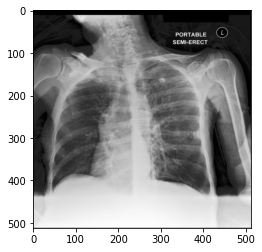

In [48]:
plt.imshow(item.image.permute(1, 2, 0))